Osnabrück University - Computer Vision (Winter Term 2016/17) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 07: Fourier Transform

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, January 15, 2017**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Expectation and Variance) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is the relation between mean and expectated value? How to compute it?

**b)** What is the variance? What does it express? Why is there a square in the formula?

**c)** Can you compute mean and variance of a given 1-dimensional dataset (e.g., $D=\{9,10,11,7,13\}$). Can you do the same for a 3-dimensional dataset (e.g., D=\{(1,10,9), (1,10,10), (10,10,11), (19,10,7), (19,10,13)\})?

## Exercise 1 (Understanding Fourier Transform – 6p)

This exercise aims at getting some intuition of finite, 2d-Fourier transform.

**a)** Transform the image `dolly.png` into the frequency space (you may use the function
`numpy.fft.fft2`). The result will be a complex matrix. Plot histograms for the amplitude and phase
values.

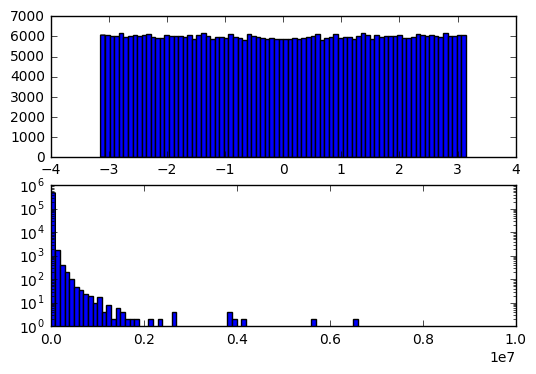

In [1]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

img = misc.imread('dolly.png', mode = 'F')

mat = np.fft.fft2(img)

amplitude = np.abs(mat)
phase = np.angle(mat)
#amplitude = amplitude/amplitude.max()
#print(amplitude.min(), amplitude.max())
#print(phase)
#print(amplitude)
plt.subplot(2,1,1)
hist1 = plt.hist(phase.flatten().astype('float'),80)
plt.subplot(2,1,2)
hist2 = plt.hist(amplitude.flatten().astype('float'),100,range = (0, 1e+07), log = True)
#hist2 = plt.hist(amplitude.flatten().astype('float'),500,range=(1.11826952e+05,3.72756190e+07), log = True)

#print(bins)

plt.show()

**b)** Display the amplitude and phase in separate images. You may again take the logarithm of
the amplitude to enhance the contrast. You may also center the base frequency (see Matlab
function fftshift).

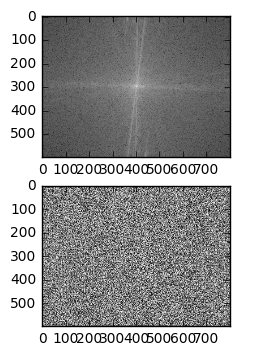

In [3]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

img = misc.imread('dolly.png', mode = 'F')
mat = np.fft.fft2(img)
amplitude = np.abs(mat)
phase = np.angle(mat)
logamp = np.log(amplitude)
plt.subplot(2,1,1)
plt.gray()
plt.imshow(np.fft.fftshift(logamp))
plt.subplot(2,1,2)
plt.imshow(phase)
plt.show()

**c)** Transform the image back from the frequency space to the image space (again using `fft2`).
What do you observe? Explain and repair the result.

In [ ]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

img = misc.imread('images/dolly.png', mode = 'F')
mat = np.fft.fft2(img)
inv = np.fft.ifft2(mat)

# got something complex back, transform with real to amplitude
plt.imshow(np.real(inv))

plt.show()

**d)** Now restore the image, but only keep the amplitude and vary the phase. Try fixed phase
values (0, $\pi/2$,. . . ), a random phase matrix, or a noisy version of the original phase values.

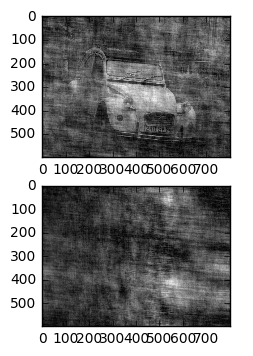

In [3]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

plt.gray()
img = misc.imread('dolly.png', mode = 'F')
mat = np.fft.fft2(img)
amplitude = np.abs(mat)
phase = np.angle(mat)
# random noise added to phase info
phase1 = phase + np.random.normal(size=phase.shape)
# only shuffled
phase2 = np.copy(phase)
np.random.shuffle(phase2)

compl= amplitude * np.exp(1j*phase1)
inv = np.fft.ifft2(compl)

plt.subplot(2,1,1)
plt.imshow(np.abs(inv))

plt.subplot(2,1,2)
compl2= amplitude * np.exp(1j*phase2)
inv2 = np.fft.ifft2(compl2)
plt.imshow(np.abs(inv2))
plt.show()


**e)** Do the same, but now keep the phase while varying the amplitude values. Again try constant,
amplitude, randomly distributed amplitudes and noisy versions of the the original values.


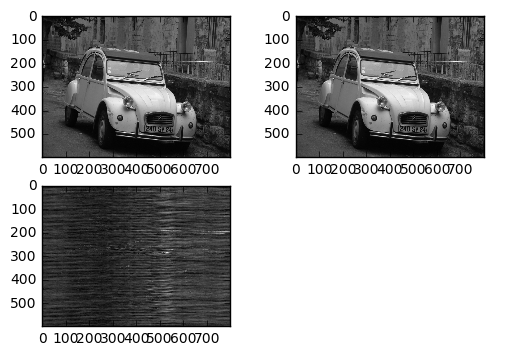

In [60]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

img = misc.imread('images/dolly.png', mode = 'F')
mat = np.fft.fft2(img)
amplitude = np.abs(mat)
phase = np.angle(mat)
# random noise added to phase info
amplitude1 = amplitude + np.random.normal(size=amplitude.shape)
# only shuffled
amplitude2 = np.copy(amplitude)
np.random.shuffle(amplitude2)

compl= amplitude1 * np.exp(1j*phase)
inv = np.fft.ifft2(compl)

plt.subplot(2,2,1)
plt.imshow(np.abs(inv))

plt.subplot(2,2,2)
plt.imshow(img)
plt.subplot(2,2,3)
compl2= amplitude2 * np.exp(1j*phase)
inv2 = np.fft.ifft2(compl2)
plt.imshow(np.abs(inv2))
plt.show()
plt.show()


*Hint:* Python and numpy can deal with complex numbers: `np.real()` and `np.imag()` provide the real and imaginary parts. `np.abs()` and `np.angle()` provide amplitude and phase. `np.conj()` gives the complex conjugate.

## Exercise 2 (Implementing Fourier Transform – 8p)

**a)** 
Explain in your own words the idea of Fourier transform. What is the frequency space? What does a point in that space represent?

The Fourier transform decomposes the image information into (sin and cosine) basis functions. These functions can be translated into complex basis functions. The frequency space is the representation of the fourier transformed image.
Is it only the frequency domain i.e. a histogram for all frequency occurences or does it also take spatial info (amplitude) into account (?????????)


**b)** First implement a one-dimensional discrete version of Fourier transform, i.e. use the formula
$$ c_n = \sum_{x=0}^{L-1} f(x)\cdot e^{\tfrac{2\pi i\cdot n}{L}\cdot x} \qquad \text{for $n=0,\ldots,L-1$}$$
for complex valued coefficients.

Plot the graph and the results of your Fourier transform, using the Matplotlib function `plot()`, for different functions. Compare your results with the output of the function `numpy.fft.fft`.

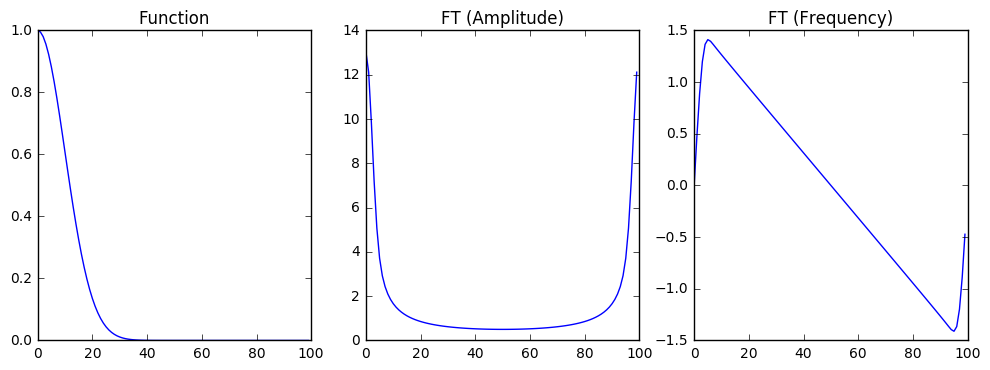

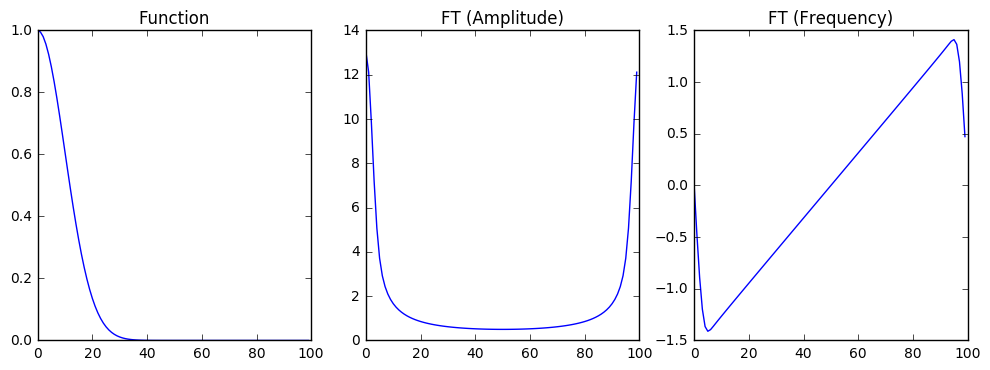

In [86]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

def fourier1d(func):
    """
    Perform a discrete 1D Fourier transform.
    
    """
    ft = np.zeros(func.shape, dtype = np.complex)
    L = func.size
    
    for n in range(L):
        for x in range(L):
            t = 2*np.pi*1j*n*x
            ft[n] += func[x]*np.exp(t/L)
                  

    return ft

# number of points
L = np.arange(100)

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

#func = np.sin(2*np.pi*L/len(L))
#func = np.zeros(L.shape); func[40:60] = 1;
func = gaussian(L, 0, 10)

ft = fourier1d(func)
#ft = np.fft.fft(func)
plt.figure(figsize=(12,4))

plt.gray()
plt.subplot(1,3,1); plt.plot(L,func); plt.title('Function')
plt.subplot(1,3,2); plt.plot(L,np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1,3,3); plt.plot(L,np.angle(ft)); plt.title('FT (Frequency)')

plt.show()

ft = np.fft.fft(func)
#ft = np.fft.fft(func)
plt.figure(figsize=(12,4))

plt.gray()
plt.subplot(1,3,1); plt.plot(L,func); plt.title('Function')
plt.subplot(1,3,2); plt.plot(L,np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1,3,3); plt.plot(L,np.angle(ft)); plt.title('FT (Frequency)')

plt.show()

**c)** Now implement a 2-dimensional version of Fourier transform for images, using the formula from the lecture. Compare your result with the output of `fft2`.

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


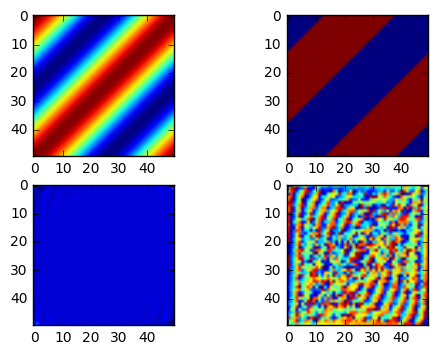

In [2]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

def fourier2d(img):
    """
    Perform discrete 2D Fourier transform of a given image.
    """

    ft = np.zeros(img.shape, dtype=np.complex)
    m,n = img.shape
    for k in range(m):
        for l in range(n):
            #u = k*m/2*np.pi
            #v = l*n/2*np.pi
            for x in range(m):
                for y in range(n):
                    #ft[u,v] = img[x,y]*np.exp(-1j*2*np.pi((u*x/m)+(v*y/n))) 
                    
                    temp = img[x,y]*np.exp(-1j*2*np.pi*((k*x/m)+(l*y/n))) 
                    ft[k,l] = temp
    return ft

img = misc.imread('dolly.png', mode = 'F')
img = img[0:50, 0:50]

mat = fourier2d(img)
amplitude = np.real(mat)
phase = np.angle(mat)

mat2 = np.fft.fft2(img)
amplitude2 = np.real(mat2)
phase2 = np.angle(mat2)

plt.subplot(2,2,1)
plt.imshow(amplitude)

plt.subplot(2,2,2)
plt.imshow(phase)

plt.subplot(2,2,3)
plt.imshow(amplitude2)

plt.subplot(2,2,4)
plt.imshow(phase2)
plt.show()


## Exercise 3 (Applying Fourier Transform – 6p)

1. Read the image `text_deg.jpg`, display it and apply Fourier transform. The resulting amplitude should show the angle of the text.

2. Try to automatically get the rotation angle from the Fourier space. There are different ways to achieve this.
   Hints:
   * You may apply an erosion operation to strengthen the text sections and thereby get
     better (i.e. less noisy) amplitude values.
   * You may threshold the amplitudes, to only keep “relevant” values. You can then compute the angle of the largest relevant value.
   * Alternatively, you may apply methods you know from other lectures to get the main component and compute its angle.

3. Rotate the image back to its originally intended orientation (`scipy.misc.imrotate`).

In [ ]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

# FIXME: put your code here!
